## AXA Data Challenge
We have data from a motor insurance. We want to figure out if there will be a claim within the next year (indicated by the is_claim column)
Figure out which variables might be usefull for predict. Experiment with the data, discuss with others to get the best result. 

In [12]:
# Import required packages
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay


In [13]:
# Load Dataset
url="./../data/train_qWM28Yl.csv"
insurance_claims=pd.read_csv(url)
train, test = train_test_split(insurance_claims,  test_size=0.33)

In [14]:
# Let's look into the data
insurance_claims.columns

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [15]:
# Fit a regression model to predict if there will be a claim in the upcoming year. 
# Syntax: https://www.statsmodels.org/dev/example_formulas.html
# C is to indicate that the variable is a categrial
# A*B indicates that there is a interaction between A and B
# np.log(A), np.exp(A), A**2 indicated a non linear realtion

model = smf.glm(formula  = 'is_claim ~ age_of_policyholder + population_density + age_of_car', data=train, family=sm.families.Binomial())
results = model.fit()
print(results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               is_claim   No. Observations:                39256
Model:                            GLM   Df Residuals:                    39252
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9249.1
Date:                Tue, 27 Feb 2024   Deviance:                       18498.
Time:                        15:25:19   Pearson chi2:                 3.92e+04
No. Iterations:                     6   Pseudo R-squ. (CS):           0.001382
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.8395    

In [16]:
# predict data from the test set
prediction= results.predict(test)>np.mean(train["is_claim"])

0.1308551581714071


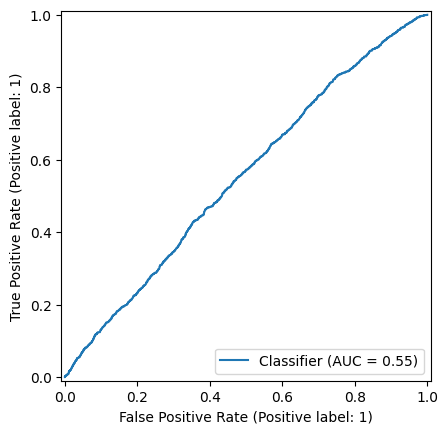

In [74]:
#calculate F1 score, closer to 1 is good
print( f1_score(test["is_claim"], prediction ))

# If the curve is close to the upper left the model is good
RocCurveDisplay.from_predictions(
    test["is_claim"], results.predict(test))
plt.show()

### Useful plots to detect realtion between variable and target

<Axes: title={'center': 'age_of_policyholder'}, xlabel='is_claim'>

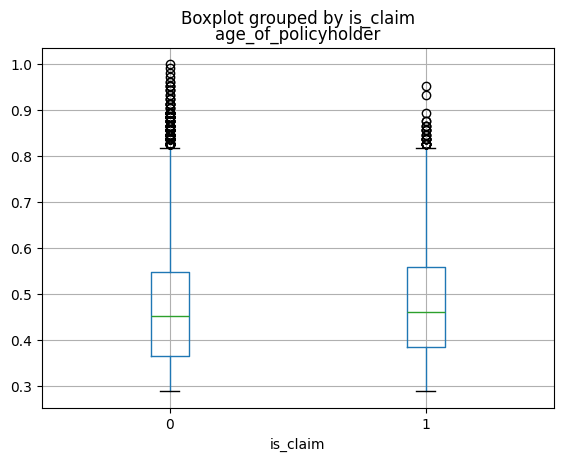

In [34]:
# 1. Boxplot

insurance_claims.boxplot(column=['age_of_policyholder'], by='is_claim')

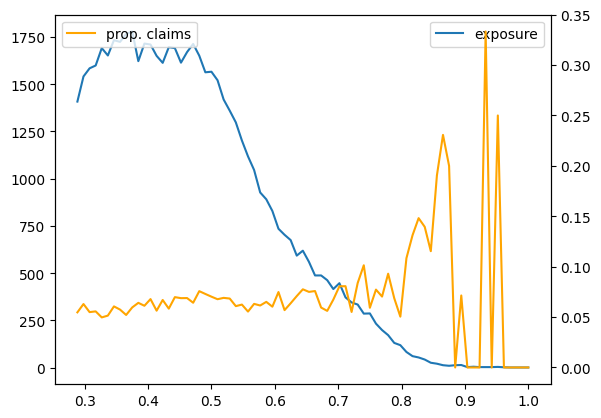

In [71]:
# 2. Plot to detect nonlinear connections

fig, ax = plt.subplots()
plt.plot( insurance_claims.groupby(by=["age_of_policyholder"], dropna=False)["age_of_policyholder"].count() , label="exposure")
plt.legend()
ax2 = ax.twinx()
plt.plot( insurance_claims.groupby(by=["age_of_policyholder"], dropna=False)["is_claim"].mean(), color="orange" , label="prop. claims")

plt.legend()
plt.show()